In [1]:
import pandas as pd
import numpy as np
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet ("../../data/dvf_vente_appartement.parquet")
print (df.shape)
print (df.info())

(2908327, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908327 entries, 0 to 2908326
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   date_mutation                 object 
 2   numero_disposition            Int64  
 3   nature_mutation               object 
 4   valeur_fonciere               Float64
 5   adresse_numero                Int64  
 6   adresse_suffixe               string 
 7   adresse_nom_voie              object 
 8   adresse_code_voie             string 
 9   code_postal                   Int64  
 10  code_commune                  string 
 11  code_departement              string 
 12  numero_volume                 string 
 13  lot1_numero                   string 
 14  lot1_surface_carrez           Float64
 15  lot2_numero                   string 
 16  lot2_surface_carrez           Float64
 17  lot3_numero                   string 
 18  lot3_sur

valeur_fonciere
150000.0       24709
120000.0       23169
100000.0       22027
200000.0       21413
130000.0       21295
               ...  
85000000.0         1
89899536.0         1
340400000.0        1
97.0               1
7.4                1
Name: count, Length: 166087, dtype: int64


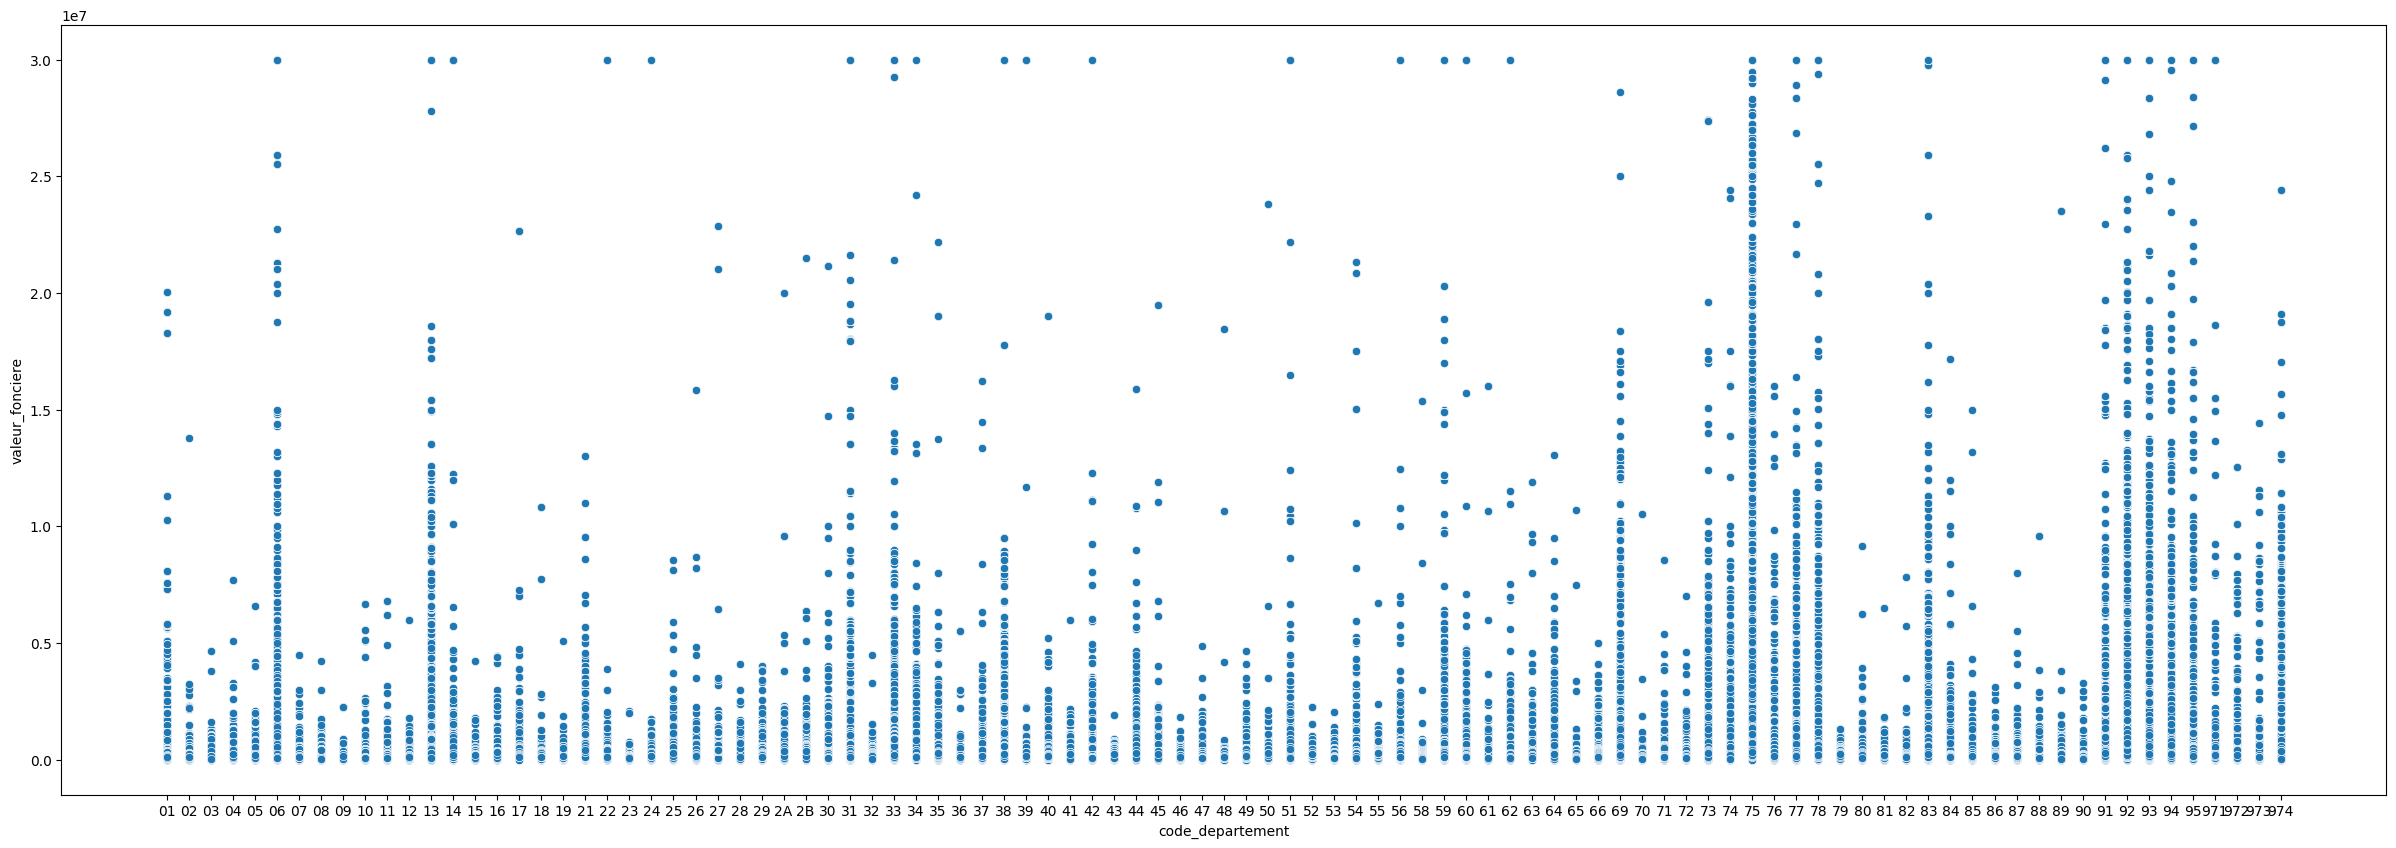

In [3]:
print(df.value_counts("valeur_fonciere"))
df['valeur_fonciere'] = df['valeur_fonciere'].apply(lambda x : 30000000 if x > 30000000 else x)
df1 = df.sort_values(by=["code_departement"])
plt.figure(figsize=(30,10))
sns.scatterplot(y=df1["valeur_fonciere"],x=df1["code_departement"])
plt.show()

In [4]:
# limit to Rhone department
df = df[ df["code_departement"] == "69"]
print (df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 117275 entries, 321418 to 2726675
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_mutation                   117275 non-null  object 
 1   date_mutation                 117275 non-null  object 
 2   numero_disposition            117275 non-null  Int64  
 3   nature_mutation               117275 non-null  object 
 4   valeur_fonciere               117065 non-null  float64
 5   adresse_numero                113161 non-null  Int64  
 6   adresse_suffixe               6605 non-null    string 
 7   adresse_nom_voie              117275 non-null  object 
 8   adresse_code_voie             117275 non-null  string 
 9   code_postal                   117275 non-null  Int64  
 10  code_commune                  117275 non-null  string 
 11  code_departement              117275 non-null  string 
 12  numero_volume                 0 non-null   

In [5]:
print (df.lot1_numero.value_counts())
columns = ["lot1_numero","lot1_surface_carrez","surface_reelle_bati","nombre_pieces_principales","code_nature_culture","surface_terrain","valeur_fonciere"]
for column in columns :
    print (df[column].value_counts())
columns = ["code_postal","code_commune","code_departement"]
for column in columns :
    print (df[column].value_counts())



lot1_numero
1       3005
2       2839
3       2461
10      2423
11      2276
        ... 
1509       1
688        1
3092       1
784        1
2174       1
Name: count, Length: 2074, dtype: Int64
lot1_numero
1       3005
2       2839
3       2461
10      2423
11      2276
        ... 
1509       1
688        1
3092       1
784        1
2174       1
Name: count, Length: 2074, dtype: Int64
lot1_surface_carrez
70.0       66
78.5       60
50.0       60
1766.84    54
63.0       53
           ..
91.14       1
113.01      1
59.96       1
95.92       1
61.58       1
Name: count, Length: 11016, dtype: Int64
surface_reelle_bati
65.0     2807
60.0     2516
67.0     2500
68.0     2477
70.0     2321
         ... 
339.0       1
315.0       1
340.0       1
212.0       1
251.0       1
Name: count, Length: 285, dtype: int64
nombre_pieces_principales
3     37361
2     28858
4     24601
1     18006
5      6563
6      1315
7       222
0       212
8        91
9        10
10        7
12        4
32        2


In [6]:
# clean attributes
df['lot1_surface_carrez'] = df['lot1_surface_carrez'].apply(lambda x : 500 if x > 500 else x)
df['lot4_surface_carrez'] = df['lot4_surface_carrez'].apply(lambda x : 300 if x > 300 else x)
df['numero_disposition'] = df['numero_disposition'].apply(lambda x : 12 if x > 12 else x)
df['nombre_pieces_principales'] = df['nombre_pieces_principales'].apply(lambda x : 15 if x > 15 else x)
df['nombre_lots'] = df['nombre_lots'].apply(lambda x : 15 if x > 15 else x)
df['surface_terrain'] = df['surface_terrain'].apply(lambda x : 15000 if x > 15000 else x)



<class 'pandas.core.indexes.base.Index'>


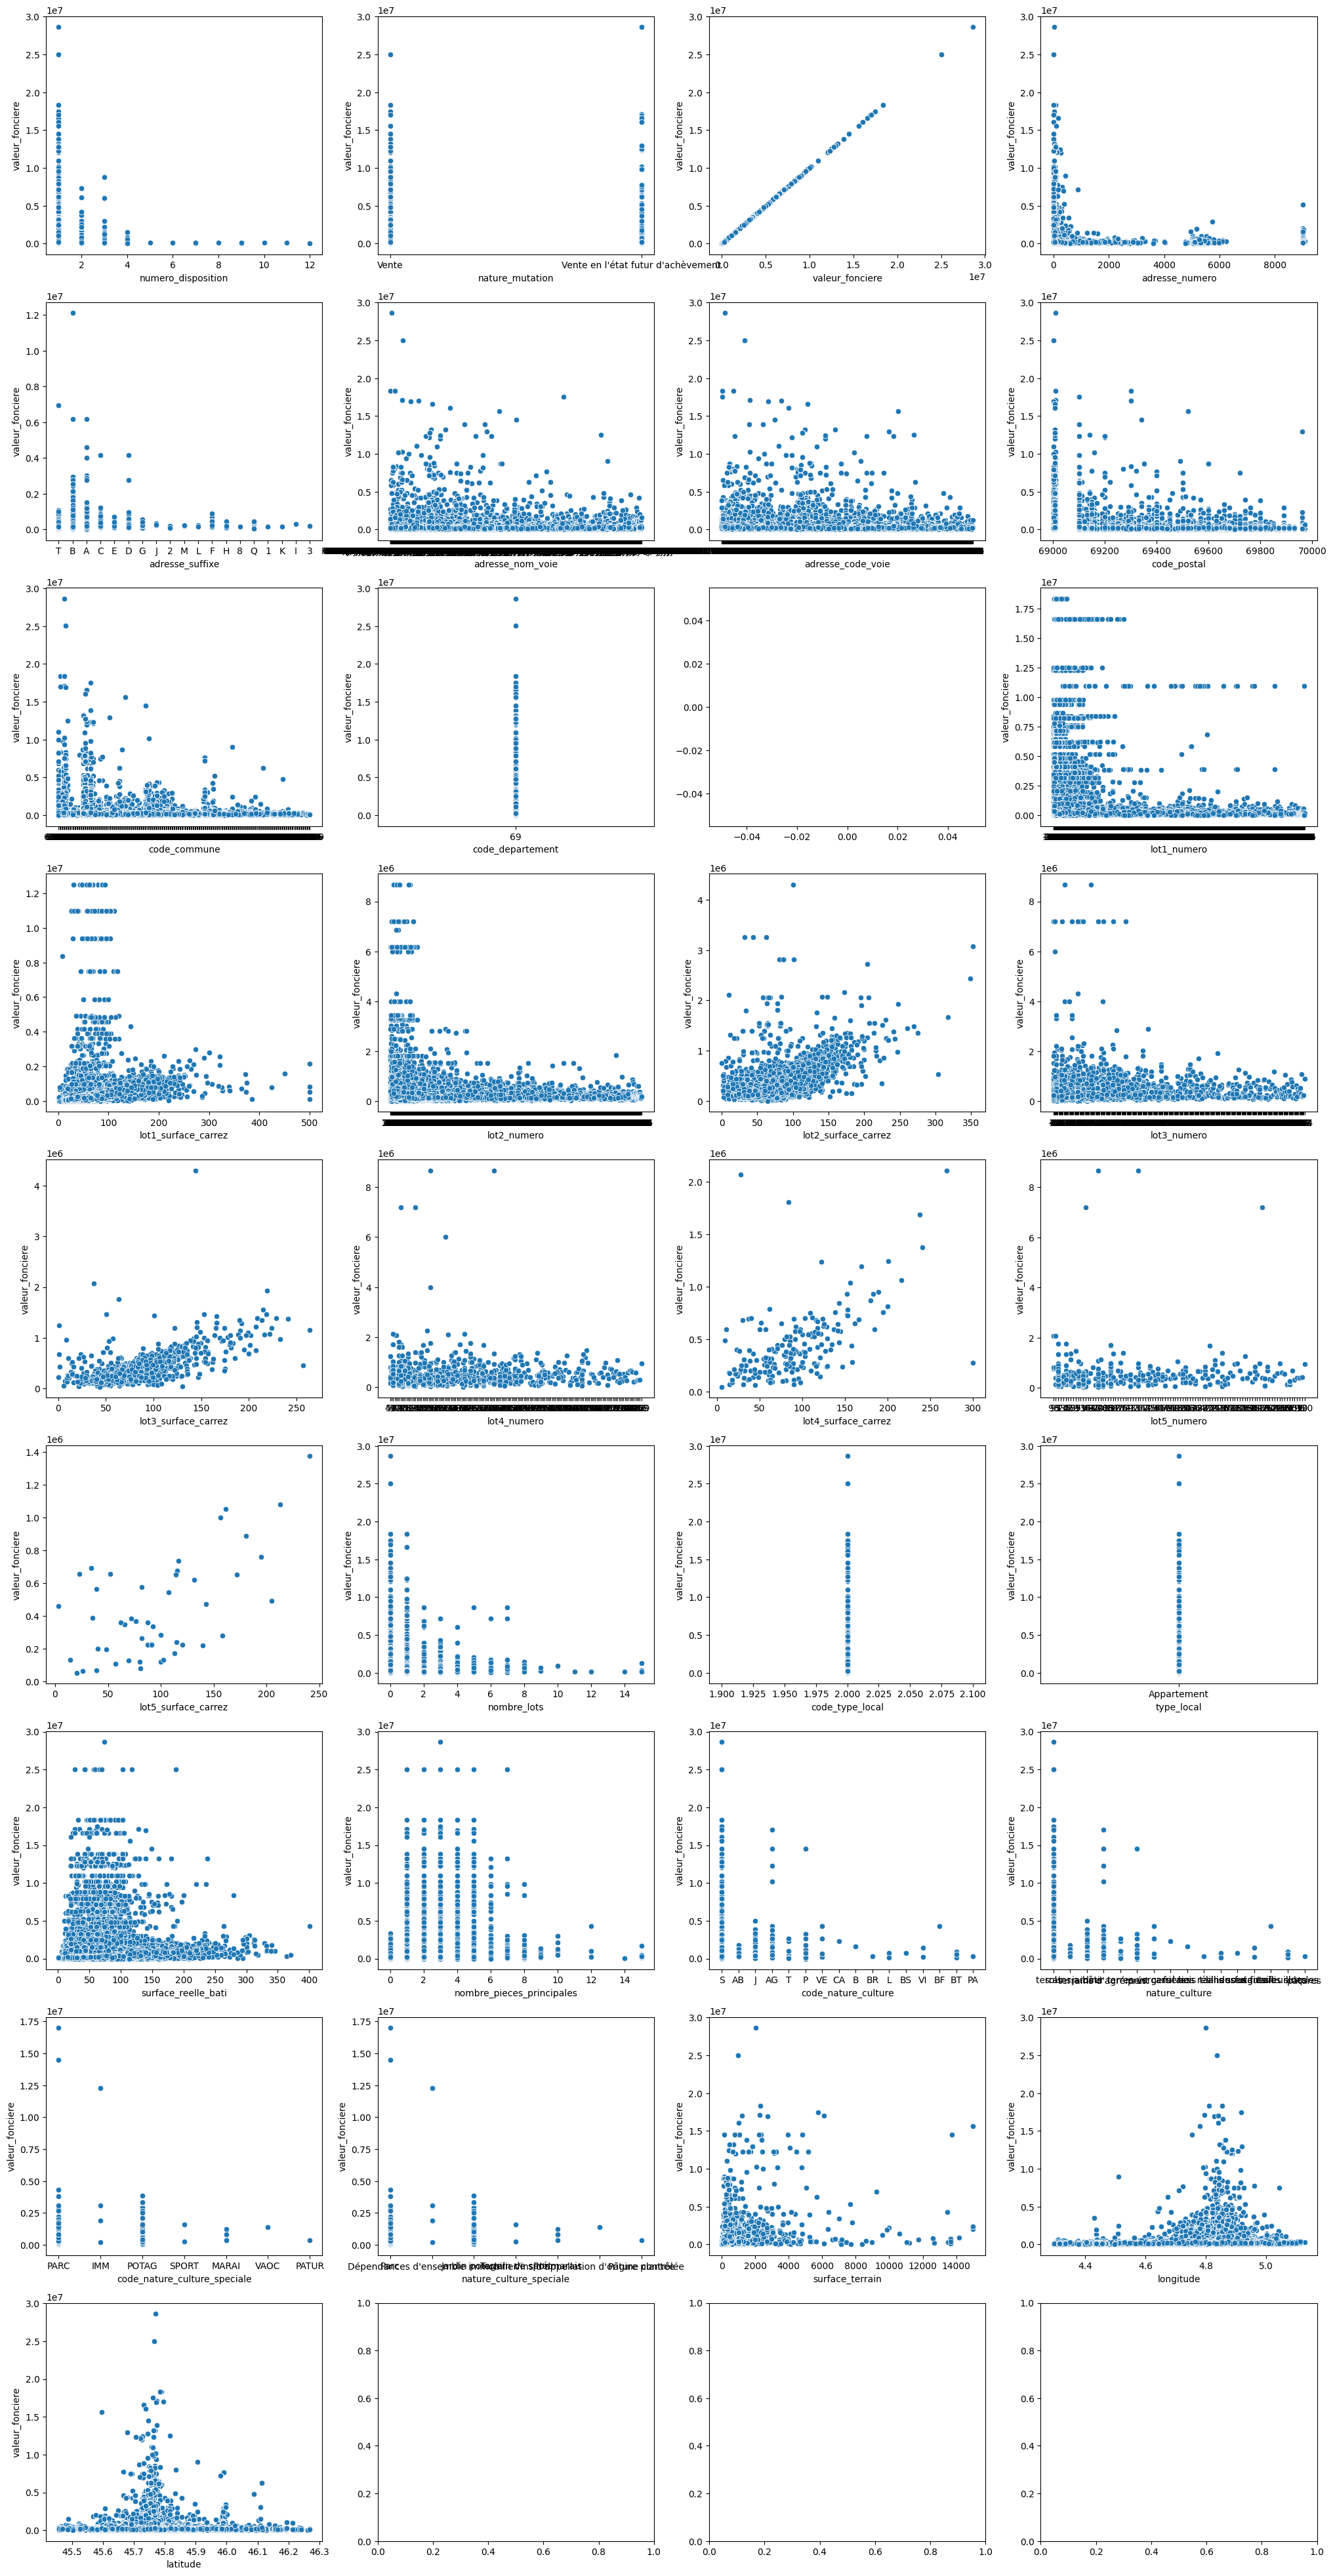

In [7]:

columns = df.columns
print (type(columns))
fig , axes = plt.subplots(nrows = 9, ncols = 4, figsize = (25,50))
index = 0
for column in columns :
    if column not in ["id_mutation","date_mutation"] :
        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["valeur_fonciere"],x=df[column])
        index = index +1